<b>Problem Statement :-</b> 

Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


# Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
Train = pd.read_csv("SalaryData_Train.csv")

In [3]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
Train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
Train.shape

(30161, 14)

In [7]:
Train.size

422254

In [8]:
# Descriptive Statistics
Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<b>Data Description:- </b>

<b>age</b> -- age of a person

<b>workclass</b>	-- A work class is a grouping of work 

<b>education</b>	-- Education of an individuals	

<b>maritalstatus</b> -- Marital status of an individulas	

<b>occupation</b>	 -- occupation of an individuals

<b>relationship</b> -- 	

<b>race</b> --  Race of an Individual

<b>sex</b> --  Gender of an Individual

<b>capitalgain</b> --  profit received from the sale of an investment

<b>capitalloss</b>	-- A decrease in the value of a capital asset

<b>hoursperweek</b> -- number of hours work per week	

<b>native</b> -- Native of an individual

<b>Salary</b> -- salary of an individual

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
#Checking Null Values
Train.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
Train.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [12]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no null values.

In [13]:
#Checking Duplicate Values
Train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [14]:
Train.duplicated().sum()

3258

There are 3258 duplicate values. Lets drop these values.

In [15]:
Train[Train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [16]:
#dropping duplicate values
train = Train.drop_duplicates()

In [17]:
train.duplicated().sum()

0

In [18]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


Now, there are no duplicate values 

In [19]:
train.shape

(26903, 14)

In [20]:
train.size

376642

In [21]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


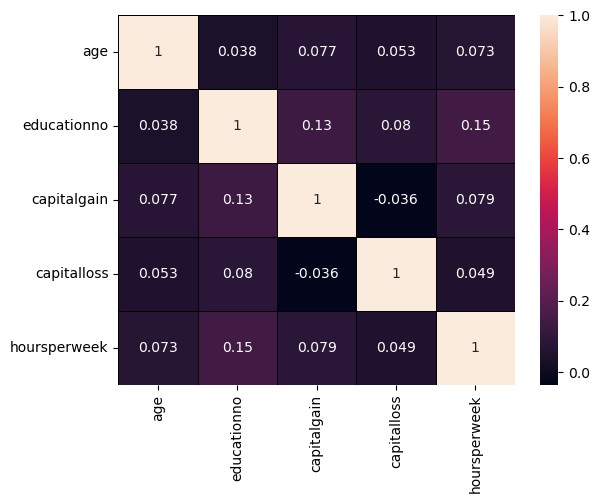

In [22]:
# Visualizing correlation through heatmap
sns.heatmap(train.corr(), annot=True, linecolor='black', linewidths=0.5)
plt.show()

# Exploratory Data Analysis

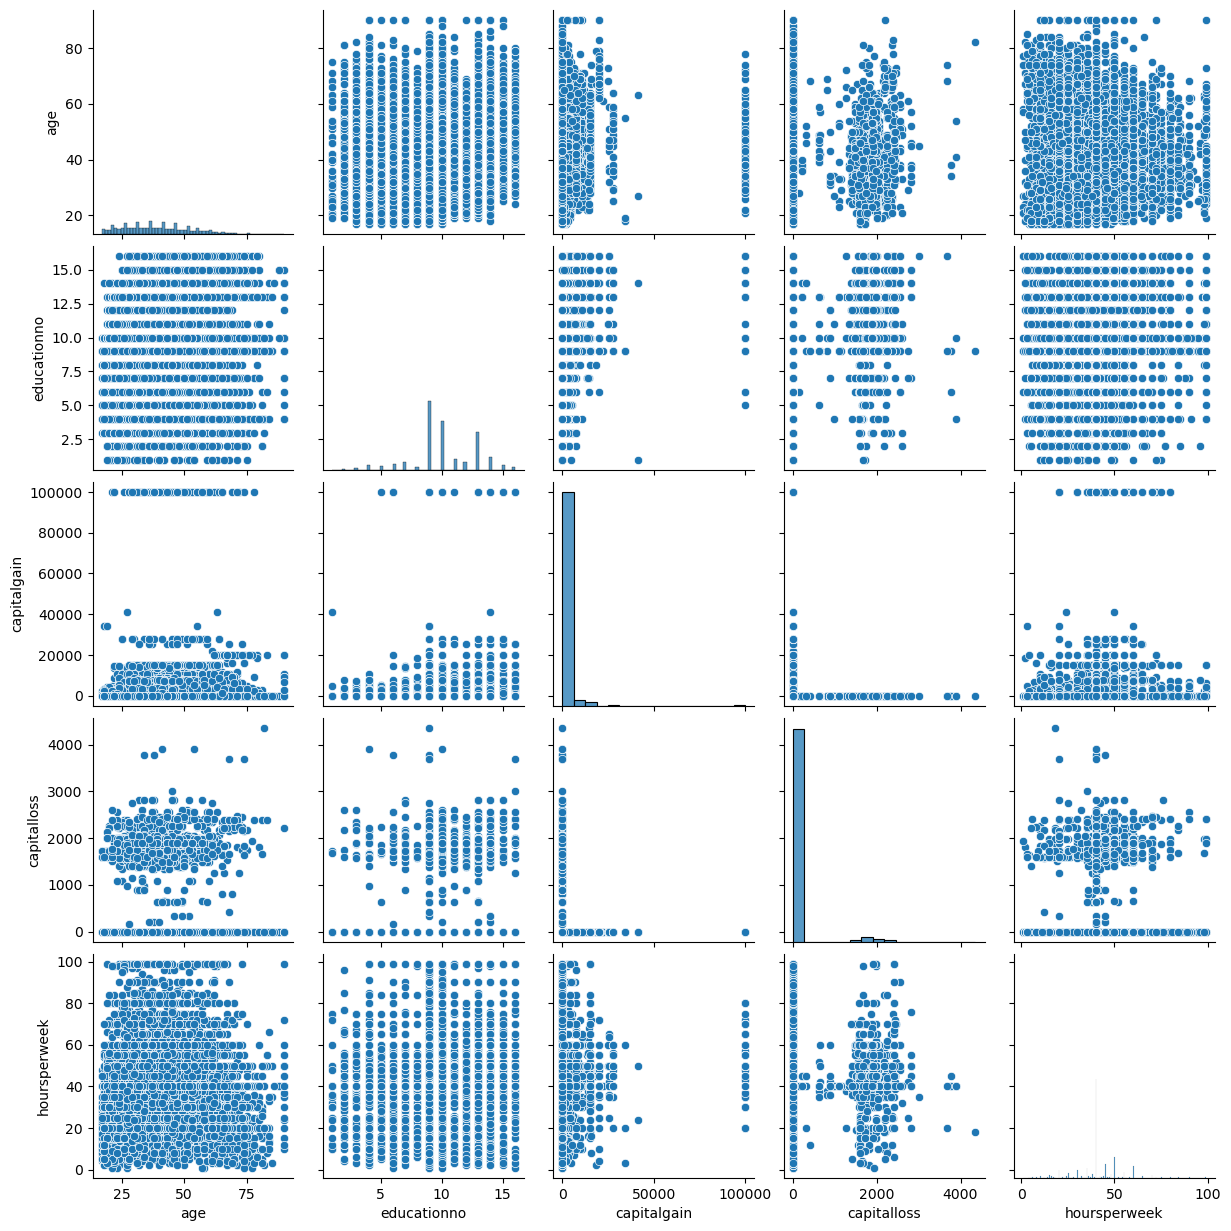

In [23]:
sns.pairplot(train)
plt.show()

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.1+ MB


### Seperating Numerical features and Categorical features for futher analysis 

In [25]:
numerical_features = train.describe(include = ['int64','float64']).columns
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

In [26]:
categorical_features = train.describe(include=['object','category']).columns
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

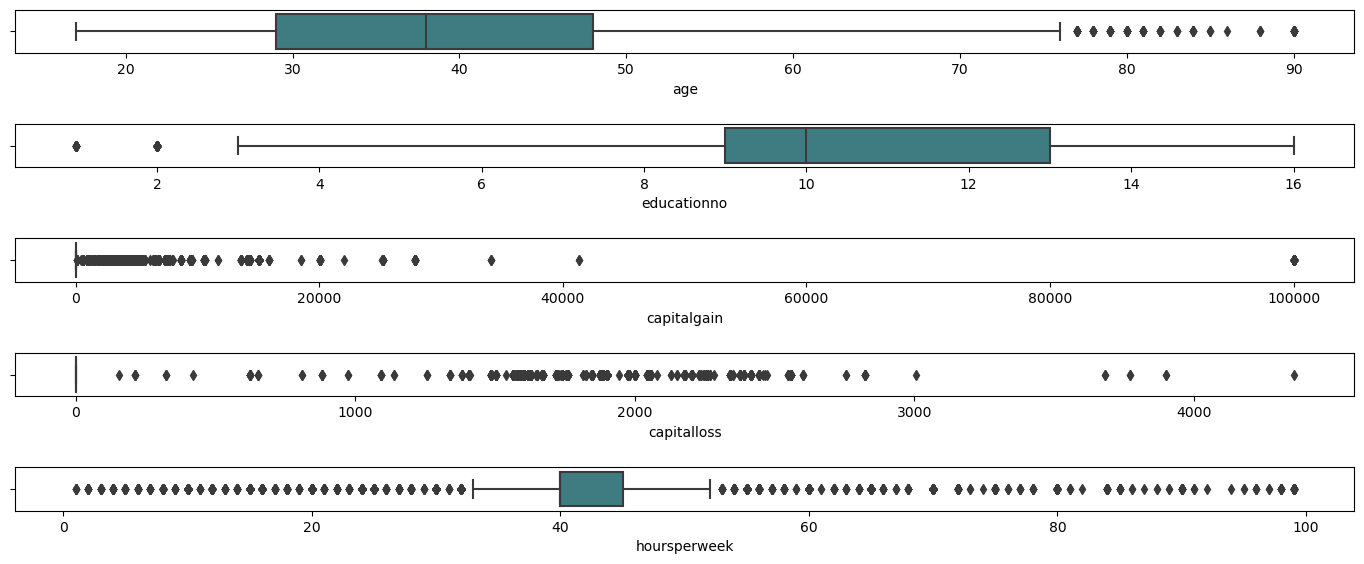

In [27]:
#Checking for outliers in numeric features
figure, axes = plt.subplots(5,1, figsize=(14,6))
sns.boxplot(x='age', data=train, palette='crest', ax=axes[0])
sns.boxplot(x='educationno', data=train, palette='crest', ax=axes[1])
sns.boxplot(x='capitalgain', data=train, palette='crest', ax=axes[2])
sns.boxplot(x='capitalloss', data=train, palette='crest', ax=axes[3])
sns.boxplot(x='hoursperweek', data=train, palette='crest', ax=axes[4])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

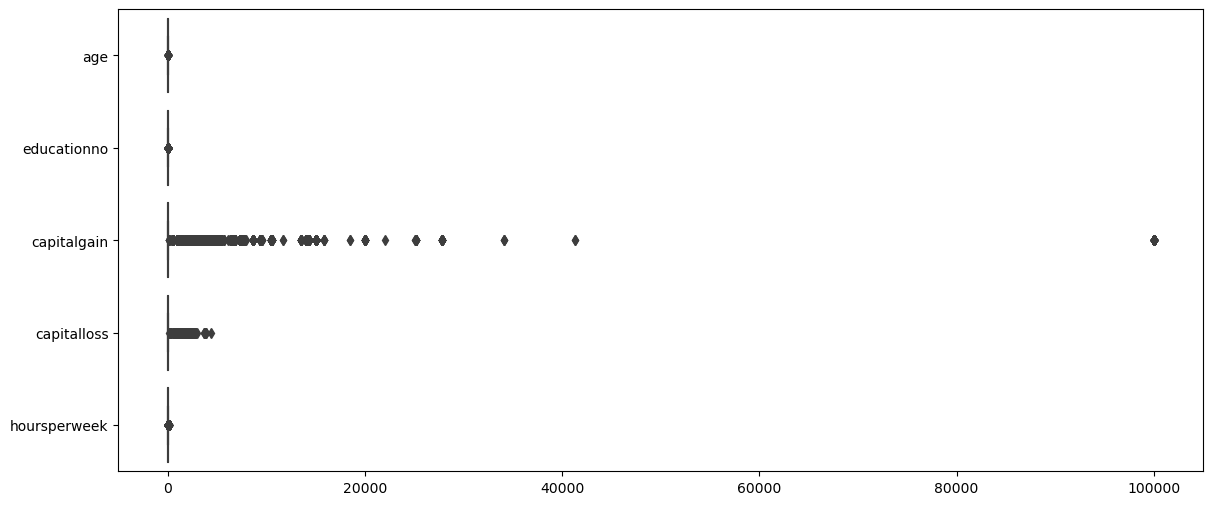

In [28]:
plt.figure(figsize=(14,6))
sns.boxplot(data=train[numerical_features], orient='h')

There are outliers present in very large number so we can't remove them from the data.

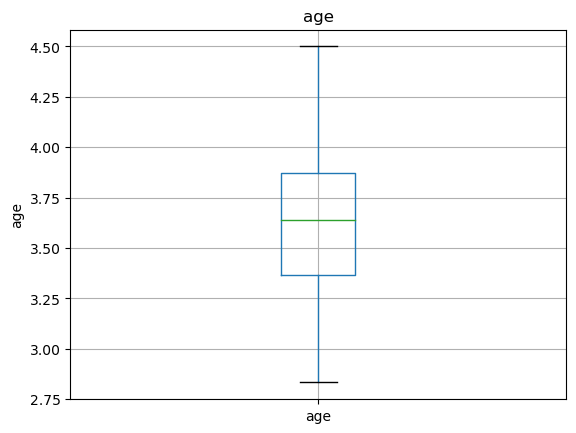

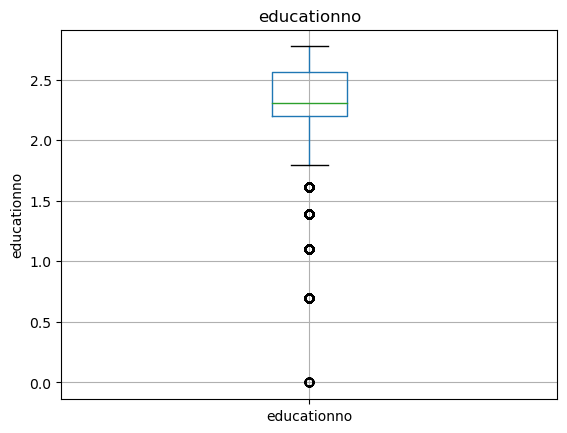

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


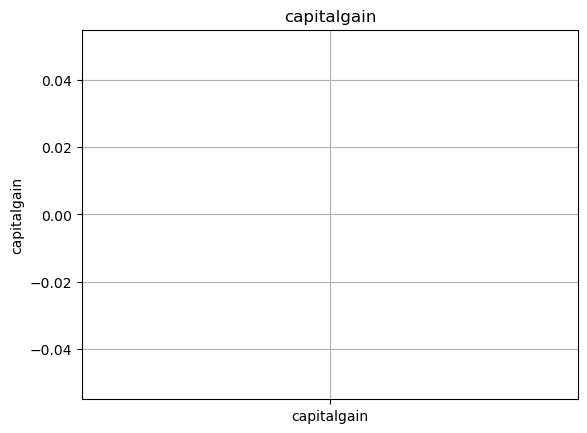

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


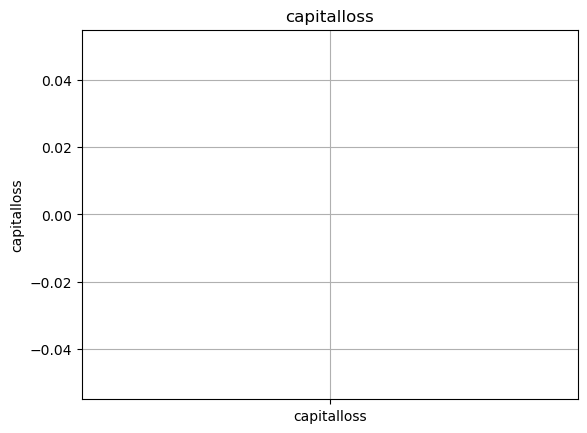

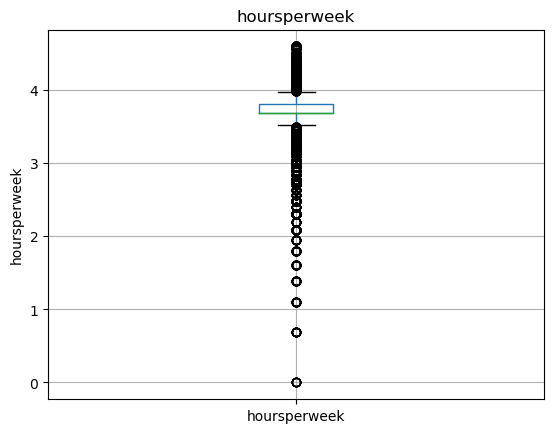

In [29]:
#Logarithmic transformation
for feature in numerical_features:
    data = train.copy()
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

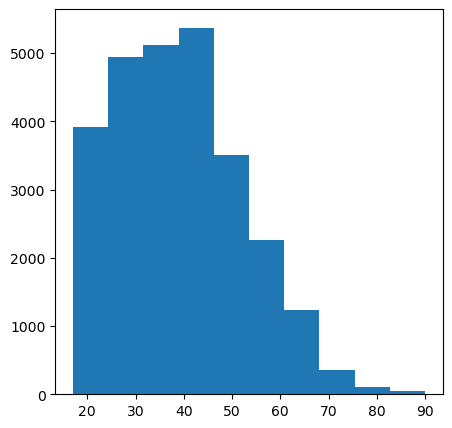

In [30]:
#Visulaizing age and hoursperweeks features
plt.figure(figsize=(5,5))
plt.hist(train['age'])
plt.show()

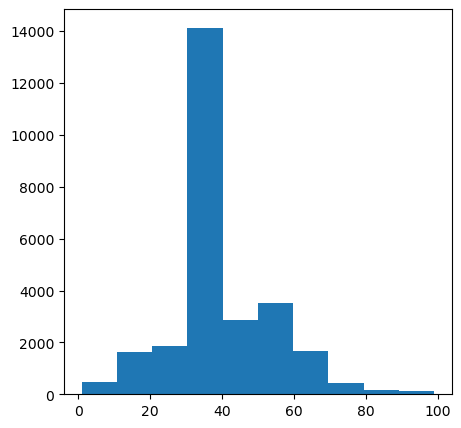

In [31]:
plt.figure(figsize=(5,5))
plt.hist(train['hoursperweek'])
plt.show()

In [32]:
train[['age','hoursperweek']].describe()

,age,hoursperweek
count,26903.000000,26903.000000
mean,39.049140,41.164591
std,13.188825,12.347051
min,17.000000,1.000000
25%,29.000000,40.000000
50%,38.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In age feature, it ranges from 17 to 90, but majority of them fall between the age of 20 to 40 (age 29 to 48 make the middle 50 percentile (25 to 75 percentile)).

Hoursperweek have a fairly normal distribution with the range lying from 1 hours to 100 hours per week. 

In [33]:
#Categorical Features
print("Number of Categorigal features are : ", len(categorical_features))

Number of Categorigal features are :  9


In [34]:
#Names of Categorical columns
print("Names of Categorical Columns are : ", categorical_features)

Names of Categorical Columns are :  Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


In [35]:
#Unique values of the categorical columns
print("Unique values of categorical column : ")

for var in categorical_features:
    print()
    print("Unique values of ", var, " is : ")
    print(train[var].unique())

Unique values of categorical column : 

Unique values of  workclass  is : 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

Unique values of  education  is : 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

Unique values of  maritalstatus  is : 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values of  occupation  is : 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

Unique values of  relationship  is : 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values of  rac

In [36]:
#Value Counts for each value of categorical column
print("Frequency of each value :")
print()

for var in train[categorical_features]:
    print("Value counts of ", var, "is : ")
    print(train[var].value_counts())
    print()

Frequency of each value :

Value counts of  workclass is : 
 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

Value counts of  education is : 
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

Value counts of  maritalstatus is : 
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

Value co

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


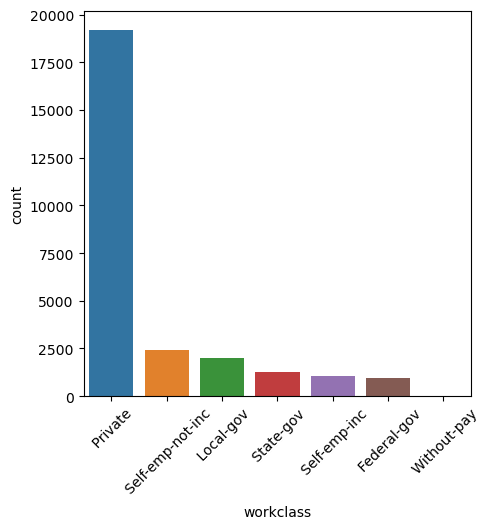

In [37]:
#Lets try some plots

plt.figure(figsize=(5,5))
sns.countplot(train['workclass'], order = train['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


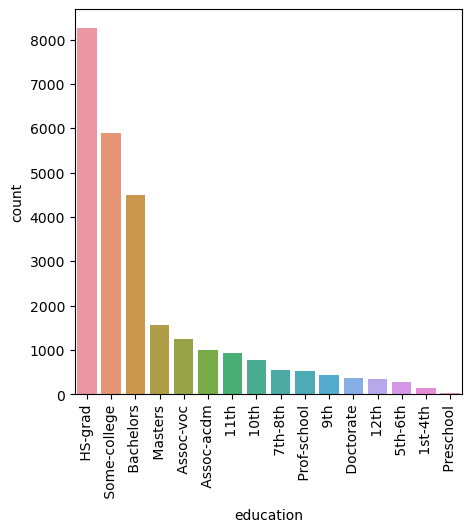

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(train['education'], order=train['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


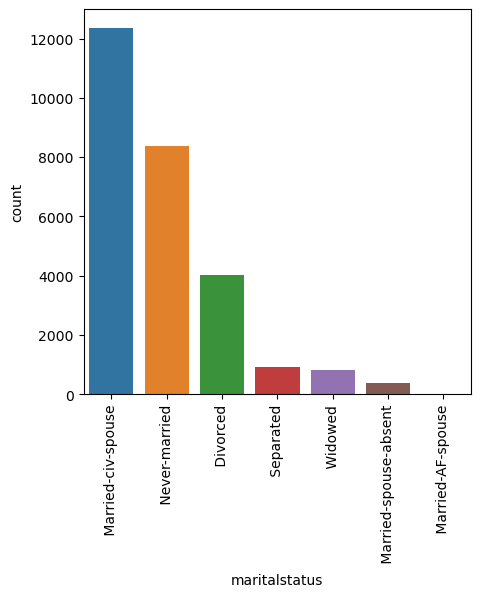

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(train['maritalstatus'],order=train['maritalstatus'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


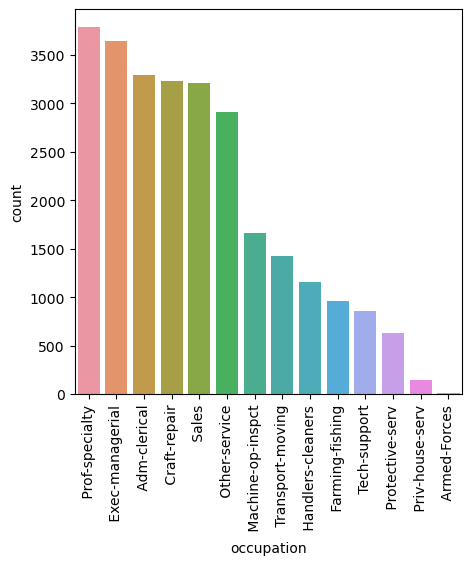

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(train['occupation'], order=train['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


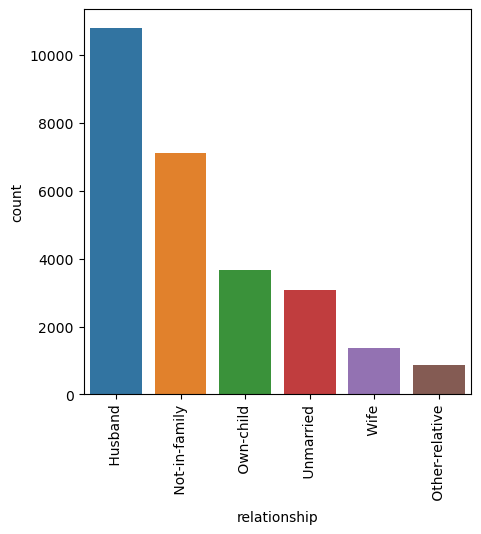

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(train['relationship'], order=train['relationship'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


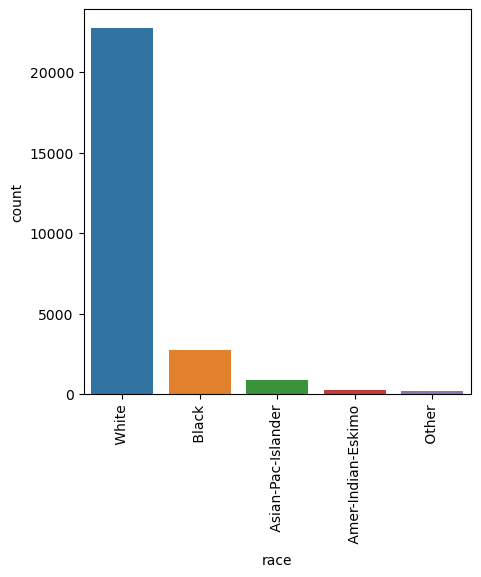

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(train['race'], order=train['race'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


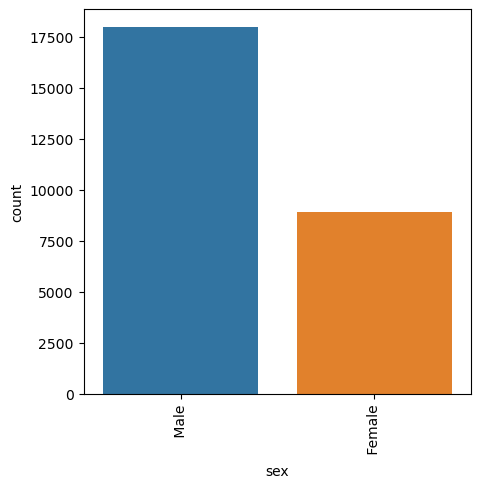

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(train['sex'],order=train['sex'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


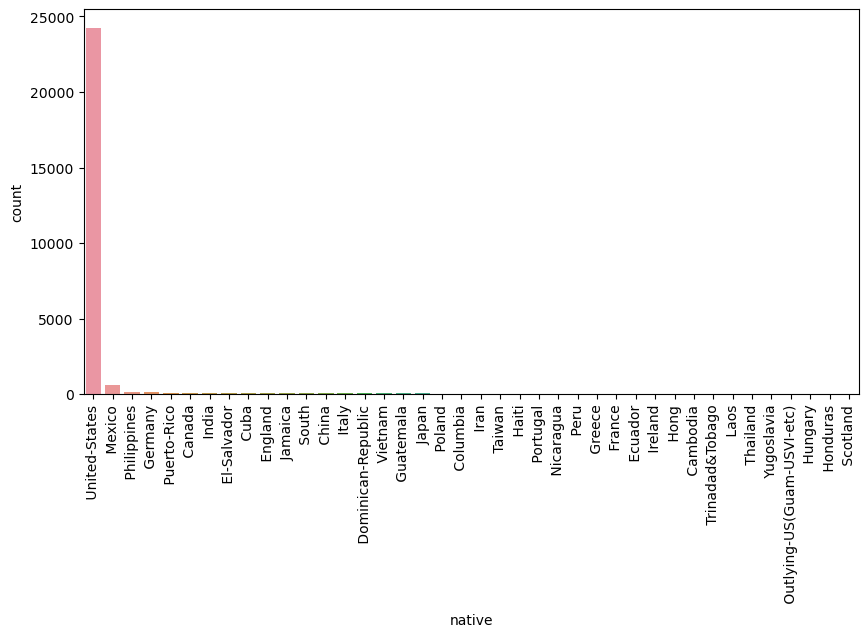

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(train['native'], order=train['native'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


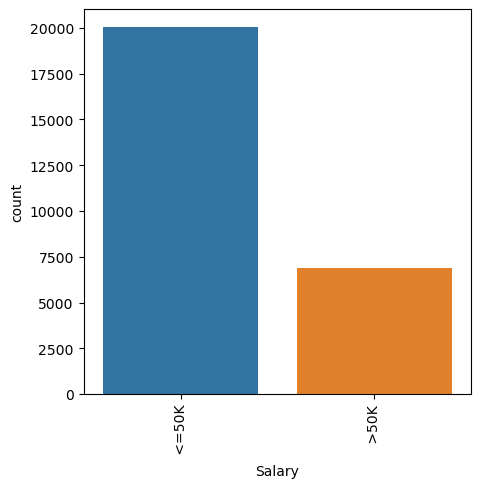

In [45]:
plt.figure(figsize=(5,5))
sns.countplot(train['Salary'], order=train['Salary'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

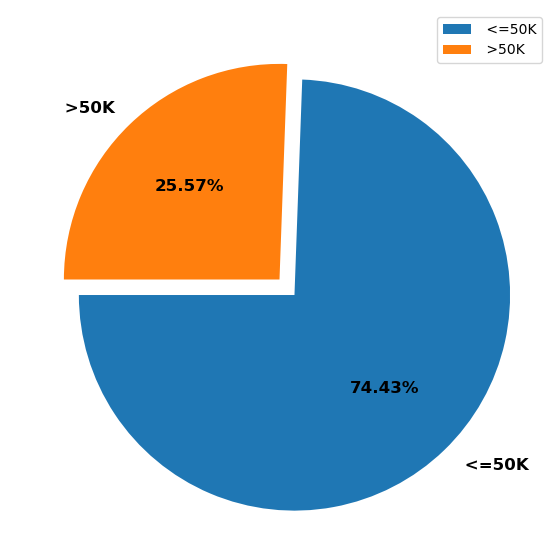

In [46]:
plt.figure(figsize=(7,7))

plt.pie(train['Salary'].value_counts(),
       explode=[0.1,0.0],
       labels = train.Salary.unique(),
       autopct = '%.2f%%',
       startangle=180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.show()

# Data Preprocessing

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
# Changing categorical columns with label encoder for model building
labelencoder = LabelEncoder()
for i in categorical_features:
    train[i] = labelencoder.fit_transform(train[i])

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_1584\2921185370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i] = labelencoder.fit_transform(train[i])


In [49]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [50]:
len(train.columns)

14

In [51]:
#splitting the train data in dependent and independent variables
x_train = train[Train.columns[0:13]].values
y_train = train[Train.columns[13]].values

In [52]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [53]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
#Normalization
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [55]:
x_train = norm(x_train)

In [56]:
x_train

array([[3.900039e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.000050e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.300013e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [2.700027e-04, 2.000020e-05, 7.000070e-05, ..., 0.000000e+00,
        3.800038e-04, 3.700037e-04],
       [5.800058e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.200052e-04, 3.000030e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04]])

# Training SVM model for Classification

In [57]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import cross_val_score

### Model with linear kernel

In [58]:
model_linear = SVC(kernel='linear', random_state=40, gamma=0.1, C=1.0)

In [59]:
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [60]:
pred_linear = model_linear.predict(x_train)

In [61]:
np.mean(pred_linear == y_train)

0.7901349291900531

In [62]:
accuracy_score(pred_linear, y_train)

0.7901349291900531

In [63]:
confusion_matrix(y_train, pred_linear)

array([[19819,   204],
       [ 5442,  1438]], dtype=int64)

### Model with poly kernel

In [64]:
model_poly = SVC(kernel='poly', random_state=40, gamma=0.1, C=1.0)

In [65]:
model_poly.fit(x_train, y_train)

SVC(gamma=0.1, kernel='poly', random_state=40)

In [66]:
pred_poly = model_poly.predict(x_train)

In [67]:
accuracy_score(y_train, pred_poly)

0.7442664386871353

In [68]:
confusion_matrix(y_train, pred_poly)

array([[20023,     0],
       [ 6880,     0]], dtype=int64)

### Model with rbf kernel

In [69]:
model_rbf = SVC(kernel='rbf', random_state=40, gamma=0.1, C=1.0)

In [70]:
model_rbf.fit(x_train, y_train)

SVC(gamma=0.1, random_state=40)

In [71]:
pred_rbf = model_rbf.predict(x_train)

In [72]:
accuracy_score(y_train, pred_rbf)

0.7829238374902427

In [73]:
confusion_matrix(y_train, pred_rbf)

array([[20010,    13],
       [ 5827,  1053]], dtype=int64)

### Model with sigmoid kernel

In [79]:
model_sigmoid = SVC(kernel='sigmoid', random_state=40, gamma=0.1, C=1.0)

In [80]:
model_sigmoid.fit(x_train, y_train)

SVC(gamma=0.1, kernel='sigmoid', random_state=40)

In [81]:
pred_sigmoid = model_sigmoid.predict(x_train)

In [82]:
accuracy_score(y_train, pred_sigmoid)

0.7703230123034606

In [84]:
confusion_matrix(y_train, pred_sigmoid)

array([[20011,    12],
       [ 6167,   713]], dtype=int64)

<b> From the above result we conclude that the linear kernel model is the best to go ahead with.

# Importing Test Data

In [107]:
test = pd.read_csv("SalaryData_Test.csv")

In [108]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [109]:
test.shape

(15060, 14)

In [110]:
test.size

210840

In [111]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [113]:
#Checking null values
test.isnull()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [114]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no null values.

In [115]:
#Checking Duplicate values
test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [116]:
test.duplicated().sum()

930

In [117]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [118]:
#dropping duplicate records
Test = test.drop_duplicates()

In [119]:
Test.shape

(14130, 14)

In [120]:
Test.size

197820

In [127]:
# Label encoding Categorical Columns
for i in categorical_features:
    Test[i] = labelencoder.fit_transform(Test[i])

C:\Users\Yadnyeshwar\AppData\Local\Temp\ipykernel_1584\1974801331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i] = labelencoder.fit_transform(Test[i])


In [128]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [129]:
Test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [130]:
#splitting the train data in dependent and independent variables
x_test = Test[Test.columns[0:13]].values
y_test = Test[Test.columns[13]].values

In [131]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [132]:
y_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [134]:
# Normalization
x_test = norm(x_test)
x_test

array([[2.500025e-04, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [2.800028e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [3.800038e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [4.400044e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        6.000060e-04, 3.700037e-04]])

# Testing on SVC with linear kernel model

In [137]:
model_linear = SVC(kernel='linear', random_state=40, gamma=0.1, C=1.0)

In [138]:
test_model_linear = model_linear.fit(x_train, y_train)

In [139]:
test_pred_linear = test_model_linear.predict(x_test)

In [140]:
accuracy_score(y_test, test_pred_linear)

0.7922151450813871

In [141]:
confusion_matrix(y_test, test_pred_linear)

array([[10498,   122],
       [ 2814,   696]], dtype=int64)